# Parte 1 — Análise Exploratória de Dados (AED)

Este projeto tem como objetivo explorar os dados da ModCloth para compreender padrões de avaliação de produtos, características dos itens e preferências dos usuários. A etapa de AED é fundamental para preparar os dados para o sistema de recomendação que será construído nas próximas etapas.

In [3]:
import pandas as pd
import numpy as np

# Download do dataset
!gdown 1r8uj9y9hTxK62Iw6q0SChGTqrmUy4sv7

# Leitura do arquivo
df = pd.read_json('/content/modcloth_final_data.json', lines=True)

# Visualização inicial
df.sample(5)


Downloading...
From: https://drive.google.com/uc?id=1r8uj9y9hTxK62Iw6q0SChGTqrmUy4sv7
To: /content/modcloth_final_data.json
100% 40.6M/40.6M [00:00<00:00, 63.3MB/s]


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
30371,406357,NaN,12,4.0,c,NaN,36.0,new,NaN,5ft 4in,hyonannie,just right,large,376858,5.5,NaN,This is a wonderful cardi,This is a wonderful cardigan for those dresses...
19931,298256,NaN,12,5.0,dd/e,39.0,38.0,dresses,NaN,5ft 6in,anniekctk,just right,small,253905,NaN,NaN,LOVE this dress! My very,LOVE this dress! My very first buy Modcloth so...
62381,659701,NaN,8,5.0,b,35.0,34.0,new,NaN,5ft 3in,ladymac.mccaskill19,just right,fit,502495,NaN,NaN,At church I got so many c,At church I got so many complements. I love th...
79924,792006,NaN,8,3.0,d,33.0,34.0,sale,NaN,5ft 4in,Rebecca,just right,fit,371346,NaN,NaN,perfect jacket! I have wo,perfect jacket! I have worn for work and play....
23389,380801,NaN,15,5.0,ddd/f,47.0,38.0,dresses,NaN,5ft 4in,erinalford2006,just right,large,844760,NaN,NaN,This is one of my very fa,This is one of my very favorite dresses! I ha...


Iniciei a análise verificando o formato dos dados e explorando o conteúdo das colunas disponíveis. Essa etapa ajuda a entender quais atributos serão úteis no modelo de recomendação.

In [4]:
# Dimensões e tipos de dados
print("Dimensões:", df.shape)
df.info()

Dimensões: (82790, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_t

Em seguida, identifiquei quais colunas tinham muitos valores ausentes. Decidi remover aquelas com mais da metade dos dados faltando. Para as demais, substituí os valores ausentes: usei a mediana para variáveis numéricas e a moda para categóricas.

In [5]:
# Percentual de valores ausentes
null_percent = df.isnull().mean().sort_values(ascending=False)
print(null_percent[null_percent > 0])

# Remoção de colunas com mais de 50% de nulos
limite = 0.5
colunas_para_dropar = null_percent[null_percent > limite].index
df.drop(columns=colunas_para_dropar, inplace=True)

# Preenchimento de colunas numéricas com a mediana
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Preenchimento de colunas categóricas com a moda
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

waist             0.965189
bust              0.856818
shoe width        0.775251
shoe size         0.662822
hips              0.322817
review_summary    0.081230
review_text       0.081230
cup size          0.075553
bra size          0.072690
height            0.013371
quality           0.000821
length            0.000423
dtype: float64


Com os dados limpos, explorei as principais colunas numéricas para entender como os valores se distribuem. Escolhi as variáveis `size`, `quality` e `price`, pois acredito que elas têm forte relação com a satisfação do cliente.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pegando as 3 primeiras colunas numéricas disponíveis no dataset
variaveis = num_cols[:3]
print("Variáveis usadas:", variaveis)

# Estatísticas descritivas
df[variaveis].describe()

Variáveis usadas: Index(['item_id', 'size', 'quality'], dtype='object')


,item_id,size,quality
count,82790.000000,82790.000000,82790.000000
mean,469325.229170,12.661602,3.949100
std,213999.803314,8.271952,0.992376
min,123373.000000,0.000000,1.000000
25%,314980.000000,8.000000,3.000000
50%,454030.000000,12.000000,4.000000
75%,658440.000000,15.000000,5.000000
max,807722.000000,38.000000,5.000000


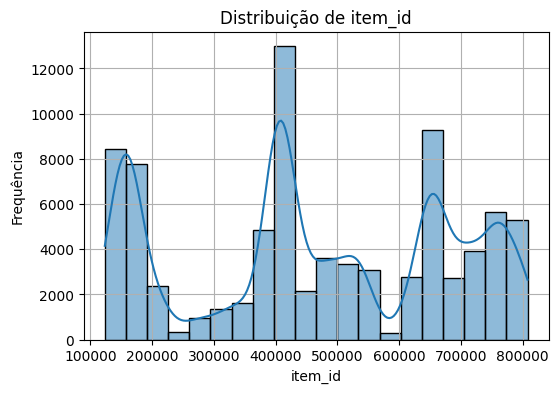

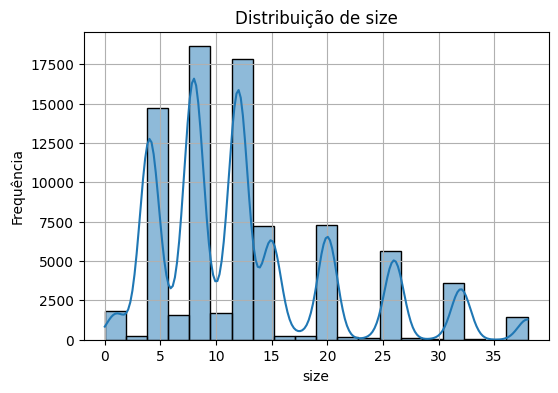

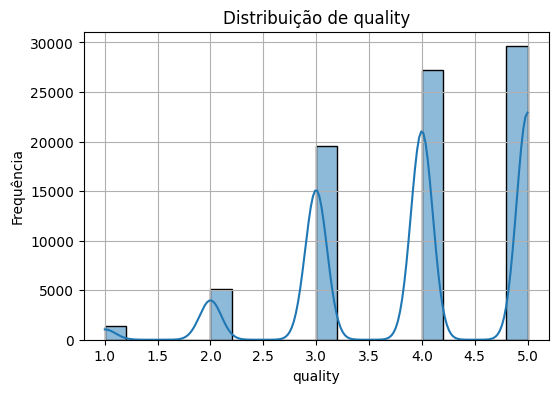

In [10]:
for col in variaveis:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

Também analisei as correlações entre variáveis numéricas para entender se existem relações fortes que podem ser aproveitadas no modelo. Usei um mapa de calor para facilitar essa visualização.


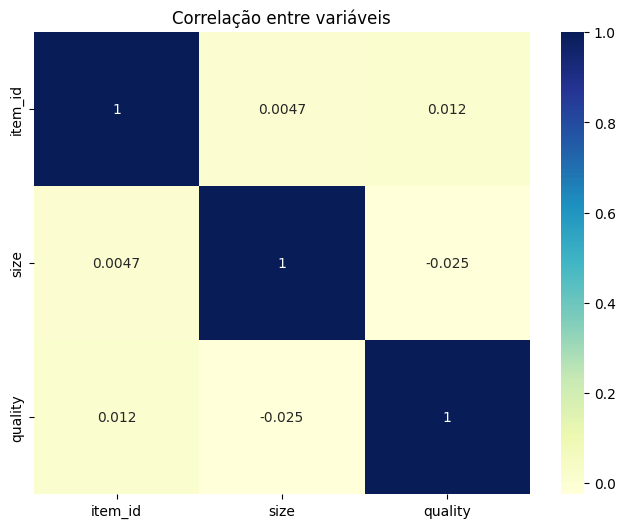

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[variaveis].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlação entre variáveis")
plt.show()

Depois, explorei variáveis categóricas como `fit`, `length` e `category`, pois elas descrevem como os produtos são percebidos. Quis entender quais são os tipos mais comuns e como isso pode impactar as recomendações.

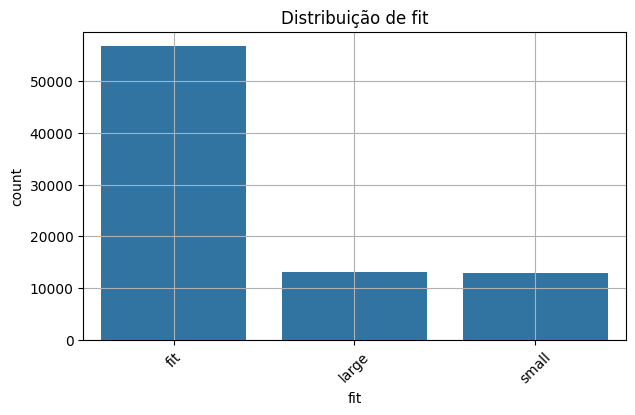

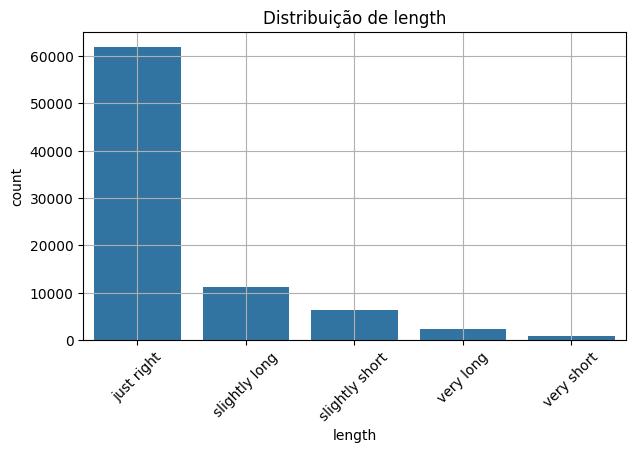

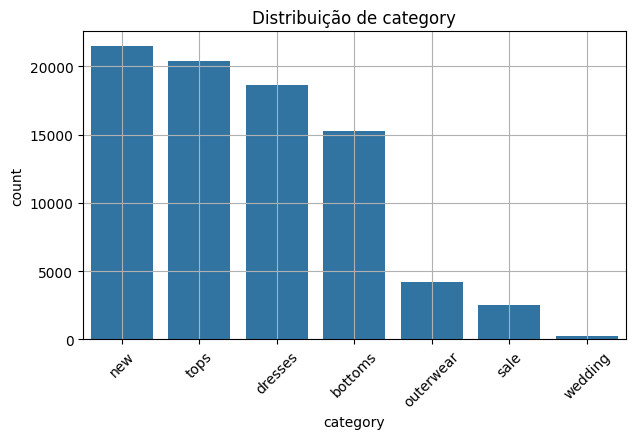

In [12]:
categorias = ['fit', 'length', 'category']
for col in categorias:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


Por último, identifiquei e tratei outliers na coluna `size`, pois valores muito fora da curva podem distorcer os resultados do modelo. Em vez de remover, preferi suavizar esses valores com a técnica chamada winsorização.


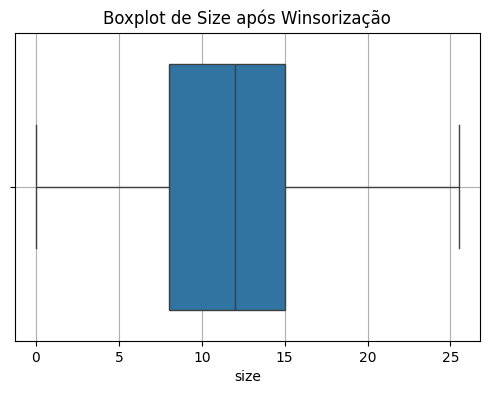

In [13]:
def winsorizar(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    limite_inf = q1 - 1.5 * iqr
    limite_sup = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], limite_inf, limite_sup)

winsorizar('size')

# Visualizando após tratamento
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='size')
plt.title('Boxplot de Size após Winsorização')
plt.grid(True)
plt.show()